We will consider the credit card fraud dataset from Kaggle for understanding Logistic Regression

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print(df.shape)

(284807, 31)


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
dd1 = df['Class'].value_counts()
print(type(dd1))
print(dd1)

<class 'pandas.core.series.Series'>
0    284315
1       492
Name: Class, dtype: int64


In [10]:
no_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]

print(type(no_fraud))
print(type(fraud))

print(no_fraud)
print(fraud)

per_no_fraud = round(no_fraud/len(df)*100, 2)
per_fraud = round(fraud/len(df)*100, 2)

print(per_no_fraud)
print(per_fraud)

<class 'numpy.int64'>
<class 'numpy.int64'>
284315
492
99.83
0.17


<AxesSubplot:xlabel='Class', ylabel='count'>

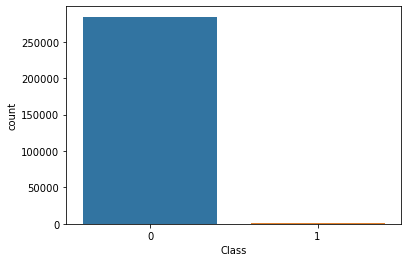

In [11]:
# Let's plot the classes

sns.countplot(x='Class', data=df)

### Creating a balanced dataset

In [13]:
# We will create a subsample that has balanced data

df = df.sample(frac=1) 

fraud_data = df.loc[df["Class"]==1] # is a dataframe
print(fraud_data.shape)

n_samples = fraud_data.shape[0]

non_fraud_data = df.loc[df["Class"]==0][:n_samples] # is a dataframe
print(non_fraud_data.shape)

new_concat = pd.concat([fraud_data, non_fraud_data]) # concat will stack one over the other

print(new_concat)

# shuffle the rows in the dataframe 
new_df = new_concat.sample(frac=1, random_state=42)

new_df.head()

(492, 31)
(492, 31)
            Time        V1        V2        V3        V4        V5        V6  \
240222  150494.0  1.852889  1.069593 -1.776101  4.617410  0.770413 -0.400859   
10497    17220.0  1.189784  0.942289  0.082334  3.024050  0.412406 -0.214415   
222133  142840.0 -3.613850 -0.922136 -4.749887  3.373001 -0.545207 -1.171301   
151807   96291.0 -3.552173  5.426461 -3.731810  6.679062 -2.187543  2.433940   
234574  148028.0 -1.053840  4.362801 -6.023534  5.304534  1.480738 -2.193821   
...          ...       ...       ...       ...       ...       ...       ...   
256018  157504.0  1.978133 -0.185656 -0.898445  0.131118 -0.272728 -0.391082   
68564    53045.0 -0.278543  0.998187  1.803641  0.316712  1.466918  0.402965   
122247   76492.0 -1.075625 -0.293257  0.436688  1.574745  3.666134  3.514299   
255276  157145.0  1.042620 -3.094167 -0.296319 -0.334716 -2.115464  0.918977   
84966    60541.0 -1.982340  0.480511  2.724733  2.981030 -0.087385  1.021480   

              V7   

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
516,382.0,-0.804275,0.379523,1.892525,0.315886,-0.194783,-0.248984,0.422565,-0.028321,-0.247661,...,-0.152900,-0.213726,0.174706,0.486816,-0.365680,0.963301,-0.045545,0.110528,45.38,0
17453,28726.0,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1
139042,82979.0,1.261250,0.320205,-0.154789,0.517741,0.113412,-0.929168,0.512556,-0.340821,-0.290155,...,-0.386760,-1.169571,0.046735,-0.110276,0.391592,0.058280,-0.056530,0.012484,33.99,0
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
124115,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00,1


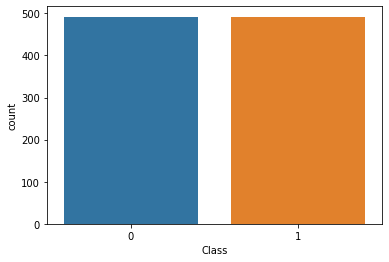

In [14]:
sns.countplot(x="Class", data=new_df)
plt.show()

++++++++
[0.0, 2125.87]
after sns


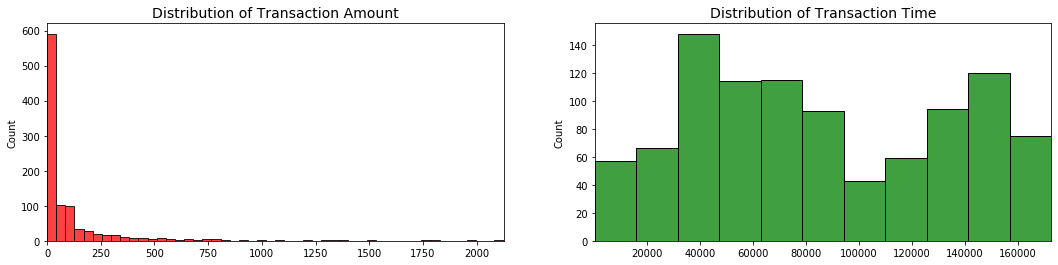

In [15]:
# Let's plot distribution of Amount and Time columns separately

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = new_df['Amount'].values
time_val = new_df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
print("++++++++")
print([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
print("after sns")

In [16]:
# x will contain all columns except the target column which is "Class" and "Time"
x = new_df.drop(['Class', 'Time'], axis=1)
y = new_df['Class']

In [17]:
#print(x.shape)

print(new_df.shape)

(984, 31)


In [18]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# we are creating an instance of StandardScaler class and then performing a fit on x_train to 
# obtain mean and standard deviation for x-train
# then use it to transorm both x_train and x_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train) # mean and standard deviation for x-train

train_sc = scaler.transform(x_train) 

test_sc = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

In [22]:
import numpy as np

print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(787,)
(787,)


In [23]:
model.fit(train_sc, y_train)

LogisticRegression(C=1)

In [24]:
print(test_sc.shape)

(197, 29)


In [25]:
ypred = model.predict(test_sc)

In [27]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[-0.0442439  -0.48830944 -0.52194101  2.68022754  0.47804795 -0.48622432
  -0.83053065 -1.65294826 -0.19280432 -1.64375927  1.12708226 -1.39232876
  -0.23076864 -2.61357226  0.03833984 -0.12549429  0.0870108  -0.03050534
  -0.07710774 -0.76040031 -0.19482277  0.68913325 -0.02410922 -0.28781201
   0.09710083 -0.24837048 -0.28204378  0.16809224  0.55764814]] [3.6954512]


### Building a confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

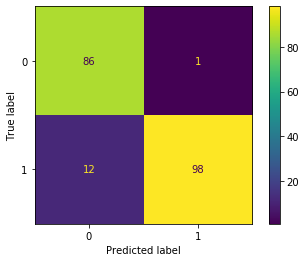

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
disp.plot()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.93


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [38]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.94
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        87
           1       0.99      0.89      0.94       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



### Checking true value of taget with the predicted value

In [39]:
from sklearn.metrics import roc_curve
print(test_sc.shape)
print(y_test[0:5])
b = model.predict_proba(test_sc)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

(197, 29)
42856     1
141260    1
234088    0
150668    1
56703     1
Name: Class, dtype: int64
[1.         0.99999997 0.03089346 1.         0.29841644]


### Plotting ROC

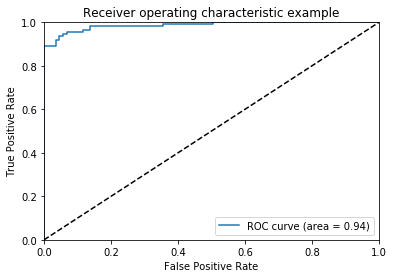

In [40]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()